In [9]:
from feature_extraction_pipeline.open_data_marine_weather.core import MarineWeatherExtractor
from feature_extraction_pipeline.open_data_raw_material_price.core import RawMaterialPriceExtractor
from feature_extraction_pipeline.open_data_terrestrial_weather.core import TerrestrialWeatherExtractor
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso



def load_data(date: str):
    price, p_key = RawMaterialPriceExtractor(date=date).process()
    t_weather, t_key = TerrestrialWeatherExtractor(date=date).process()
    m_weather, m_key = MarineWeatherExtractor(date=date).process()

    # combine data
    weather = pd.merge(
        t_weather.groupby(["일시"]).mean(),
        m_weather.groupby(["일시"]).mean(),
        how='inner', left_on=t_key, right_on=m_key
    ).reset_index()

    return pd.merge(
        price, weather, 
        how="left", left_on=p_key, right_on=t_key
    ).drop("일시", axis=1).astype(dtype={"조사일자": "datetime64"})

data201908 = load_data("201908")
data201907 = load_data("201907")


2020-04-01 17:48:12:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/process/csv/201908.csv in s3 'production-bobsim'
2020-04-01 17:48:13:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/process/csv/201908.csv in s3 'production-bobsim'
2020-04-01 17:48:13:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/process/csv/201908.csv in s3 'production-bobsim'
2020-04-01 17:48:15:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/process/csv/201907.csv in s3 'production-bobsim'
2020-04-01 17:48:16:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/process/csv/201907.csv in s3 'production-bobsim'
2020-04-01 17:48:16:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/process/csv/201907.csv in s3 'production-bobsim'


In [5]:
data201908.isnull().sum().sort_values(ascending = True)

조사일자                   0
품목명_포도포도캠벨얼리캠벨얼리       0
품목명_피망(단고추)피망청피망청피망    0
품목명_한우쇠고기갈비한우갈비        0
품목명_한우쇠고기등심한우등심        0
                      ..
품목명_사과사과아오리쓰가루         0
품목명_사과사과후지후지           0
품목명_상추상추적상추적           0
품목명_새송이새송이버섯새송이버섯일반    0
최고 파주기(sec)            0
Length: 151, dtype: int64

In [6]:
data201908.head()

,조사일자,당일조사가격,품목명_갈치류갈치은갈치냉동,품목명_갈치류갈치은갈치생선,품목명_감자감자수미수미,품목명_건가공(포)류건오징어오징어포일반,품목명_건가공(해조)류건미역자연미역일반,품목명_건제품건포도건포도(수입)수입,품목명_고구마고구마(밤)밤고구마고구마(일반),품목명_고등어류고등어고등어(수입)수입,...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,2019-08-01,5.476464,0,0,1,0,0,0,0,0,...,1011.5941,91.06,25.69,24.73,0.8823,0.5293,0.7354,1.253,4.46,5.547
1,2019-08-01,7.280008,0,0,0,0,0,1,0,0,...,1011.5941,91.06,25.69,24.73,0.8823,0.5293,0.7354,1.253,4.46,5.547
2,2019-08-01,6.898715,0,0,0,0,0,0,0,0,...,1011.5941,91.06,25.69,24.73,0.8823,0.5293,0.7354,1.253,4.46,5.547
3,2019-08-01,6.957497,0,0,0,0,0,0,0,0,...,1011.5941,91.06,25.69,24.73,0.8823,0.5293,0.7354,1.253,4.46,5.547
4,2019-08-01,6.508769,0,0,0,0,0,0,0,0,...,1011.5941,91.06,25.69,24.73,0.8823,0.5293,0.7354,1.253,4.46,5.547


In [10]:
X = data201908.drop("당일조사가격",1, inplace=False)
Y = data201908["당일조사가격"]

**Using Pearson Correlation**

C:\Users\park\Anaconda3\envs\BOBSIM\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\envs\BOBSIM\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\envs\BOBSIM\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\envs\BOBSIM\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\envs\BOBSIM\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\envs\BOBSIM\lib\site-packages\matplotlib\backe

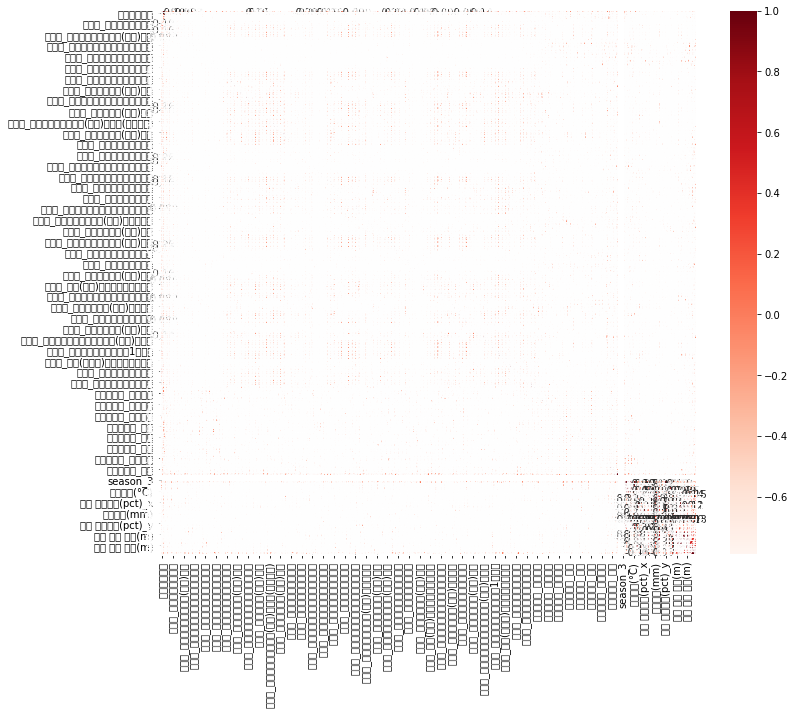

In [11]:
plt.figure(figsize=(12,10))
# default: method=pearson, min_periods=1
cor = data201908.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
cor.head(5)

,당일조사가격,품목명_갈치류갈치은갈치냉동,품목명_갈치류갈치은갈치생선,품목명_감자감자수미수미,품목명_건가공(포)류건오징어오징어포일반,품목명_건가공(해조)류건미역자연미역일반,품목명_건제품건포도건포도(수입)수입,품목명_고구마고구마(밤)밤고구마고구마(일반),품목명_고등어류고등어고등어(수입)수입,품목명_고등어류고등어망치고등어냉동,...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
당일조사가격,1.000000,0.078434,0.072614,-0.192639,0.169802,-0.156661,-0.032341,-0.093001,0.035139,0.029542,...,-0.001059,-0.002444,0.000524,0.004535,0.003437,0.003383,0.003933,0.003947,0.004817,0.004294
품목명_갈치류갈치은갈치냉동,0.078434,1.000000,-0.003022,-0.006442,-0.006164,-0.006442,-0.006442,-0.006442,-0.003368,-0.003218,...,0.000867,-0.000778,-0.003145,-0.003315,-0.000181,-0.000230,-0.000178,-0.000015,-0.001565,-0.001389
품목명_갈치류갈치은갈치생선,0.072614,-0.003022,1.000000,-0.005910,-0.005655,-0.005910,-0.005910,-0.005910,-0.003089,-0.002953,...,0.004301,0.004434,0.004760,-0.003623,-0.006270,-0.006473,-0.005418,-0.005246,-0.005767,-0.003284
품목명_감자감자수미수미,-0.192639,-0.006442,-0.005910,1.000000,-0.012055,-0.012597,-0.012597,-0.012597,-0.006586,-0.006294,...,-0.000477,-0.000571,-0.000527,0.000132,0.000638,0.000652,0.000502,0.000503,0.000340,0.000120
품목명_건가공(포)류건오징어오징어포일반,0.169802,-0.006164,-0.005655,-0.012055,1.000000,-0.012055,-0.012055,-0.012055,-0.006302,-0.006023,...,-0.000456,-0.000546,-0.000505,0.000127,0.000610,0.000624,0.000480,0.000481,0.000325,0.000115


In [20]:
cor["당일조사가격"].sort_values()

품목명_양파양파기타양파(일반)      -0.246377
품목명_미나리미나리미나리(일반)일반   -0.246038
품목명_감자감자수미수미          -0.192639
품목명_벼쌀일반계일반계          -0.164626
품목명_우유우유우유(일반)일반      -0.163896
                         ...   
품목명_한우쇠고기안심안심          0.219969
품목명_수박수박수박(일반)일반       0.278286
당일조사가격                 1.000000
is_weekend_0                NaN
season_3                    NaN
Name: 당일조사가격, Length: 150, dtype: float64

In [21]:
#Correlation with output variable
cor_target = abs(cor["당일조사가격"])
#Selecting highly correlated features
cor_target

당일조사가격                   1.000000
품목명_갈치류갈치은갈치냉동           0.078434
품목명_갈치류갈치은갈치생선           0.072614
품목명_감자감자수미수미             0.192639
품목명_건가공(포)류건오징어오징어포일반    0.169802
                           ...   
평균 유의 파고(m)              0.003383
최고 유의 파고(m)              0.003933
최고 최대 파고(m)              0.003947
평균 파주기(sec)              0.004817
최고 파주기(sec)              0.004294
Name: 당일조사가격, Length: 150, dtype: float64

In [22]:
cor_target.sum()

9.08267797382177